# Neural Network Hyperparameter Tuning

## Setup

In [2]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("FashionMNIST-NN-Optimization"):
    raise ValueError("Please change working directory to 'path/FashionMNIST-NN-Optimization' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/FashionMNIST-NN-Optimization


In [3]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 9.5 MB/s eta 0:00:00a 0:00:01m


In [4]:
import zipfile
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Fetch data

In [5]:
with zipfile.ZipFile("data/fashion_mnist_data.zip", 'r') as zip_ref:
    zip_ref.extractall("data/")

In [6]:
fmnist_train = pd.read_csv("data/fashion_mnist_train.csv")
fmnist_test = pd.read_csv("data/fashion_mnist_test.csv")

## Split data

In [7]:
y_train_valid = fmnist_train["label"]
X_train_valid = fmnist_train.drop("label", axis=1)
y_test = fmnist_test["label"]
X_test = fmnist_test.drop("label", axis=1)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=1/12, stratify=y_train_valid)

In [9]:
X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255

## Building the model

In [10]:
input_shape = (X_train.shape[1], )

In [11]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=input_shape),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

## Implement Early Stopping Callback

In [12]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience = 8,
    restore_best_weights = True
)

In [13]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), callbacks=[early_stopping], epochs=30)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 900us/step - accuracy: 0.7713 - loss: 0.6607 - val_accuracy: 0.8318 - val_loss: 0.4529
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.8586 - loss: 0.3890 - val_accuracy: 0.8606 - val_loss: 0.3911
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - accuracy: 0.8714 - loss: 0.3475 - val_accuracy: 0.8718 - val_loss: 0.3651
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.8787 - loss: 0.3234 - val_accuracy: 0.8688 - val_loss: 0.3638
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - accuracy: 0.8872 - loss: 0.3041 - val_accuracy: 0.8712 - val_loss: 0.3591
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.8928 - loss: 0.2880 - val_accuracy: 0.8626 - val_loss: 0.3785
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.8971 - loss: 0.2753 - val_accuracy: 0.8760 - val_loss: 0.3544
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.9012 -

In [15]:
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.8751 - loss: 0.3549


[0.3539576828479767, 0.8758000135421753]

In [16]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.8790 - loss: 0.3371


[0.3390892744064331, 0.8784999847412109]

## Manually tuning number of layers

In [17]:
def build_model(n_layers):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(shape=input_shape))
    model.add(tf.keras.layers.Dense(100, activation="relu"))

    for _ in range(1, n_layers):
        model.add(tf.keras.layers.Dense(100, activation="relu"))

    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    return model

In [18]:
model_1l = build_model(n_layers=1)
model_1l.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model_1l.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 923us/step - accuracy: 0.7720 - loss: 0.6558 - val_accuracy: 0.8302 - val_loss: 0.4816
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 0.8570 - loss: 0.4003 - val_accuracy: 0.8556 - val_loss: 0.4070
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - accuracy: 0.8701 - loss: 0.3568 - val_accuracy: 0.8658 - val_loss: 0.3753
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.8792 - loss: 0.3290 - val_accuracy: 0.8726 - val_loss: 0.3554
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step - accuracy: 0.8875 - loss: 0.3088 - val_accuracy: 0.8698 - val_loss: 0.3622
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - accuracy: 0.8947 - loss: 0.2925 - val_accuracy: 0.8694 - val_loss: 0.3629
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - accuracy: 0.8992 - loss: 0.2795 - val_accuracy: 0.8712 - val_loss: 0.3622
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 558us/step - accuracy: 0.9032 -

In [19]:
model_1l.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.8787 - loss: 0.3635


[0.36039090156555176, 0.8766000270843506]

In [20]:
models_per_n_layers = [model_1l]
for n_layers in range(2, 10):
    model = build_model(n_layers=n_layers)
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, verbose=0)
    models_per_n_layers.append(model)

In [21]:
def get_model_accuracy(model, X, y):
    return model.evaluate(X, y, verbose=0)[1]

valid_losses = [get_model_accuracy(model, X_valid, y_valid) for model in models_per_n_layers]

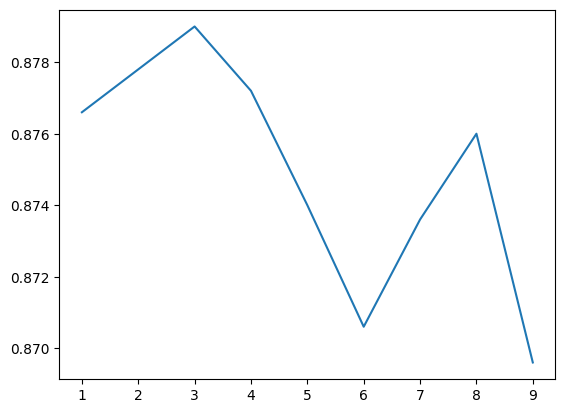

In [22]:
plt.plot(range(1, 10), valid_losses)
plt.show()

## Stretch pants approach for tuning number of neurons per layer

In [23]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=input_shape),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#### Model Checkpoint callback

In [24]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "checkpoints/stretchpants_model_checkpoints.weights.h5",
    save_weights_only=True
)

#### Stretch Pants model training

In [25]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[checkpoint, early_stopping])

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7693 - loss: 0.6375 - val_accuracy: 0.8364 - val_loss: 0.4805
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8549 - loss: 0.3977 - val_accuracy: 0.8634 - val_loss: 0.3985
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8716 - loss: 0.3541 - val_accuracy: 0.8702 - val_loss: 0.3719
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8801 - loss: 0.3248 - val_accuracy: 0.8644 - val_loss: 0.3732
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8863 - loss: 0.3065 - val_accuracy: 0.8644 - val_loss: 0.3652
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8937 - loss: 0.2918 - val_accuracy: 0.8806 - val_loss: 0.3679
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8967 - loss: 0.2720 - val_accuracy: 0.8776 - val_loss: 0.3705
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9014 - loss: 0

In [26]:
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8339 - loss: 0.4762


[0.4805144965648651, 0.8363999724388123]

## Model analysis with tensorboard

In [27]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="stretchpants_model_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

In [28]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=input_shape),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [29]:
run_logdir = get_run_logdir()

tensorboard_cb = tf.keras.callbacks.TensorBoard(
    run_logdir,
    profile_batch=(100, 200)
)

2024-06-15 14:15:49.765988: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-06-15 14:15:49.766002: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-06-15 14:15:49.767067: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


In [30]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, callbacks=[tensorboard_cb, early_stopping])

Epoch 1/30
 131/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5849 - loss: 1.1599

2024-06-15 14:15:51.389161: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-06-15 14:15:51.389180: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.


 228/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6366 - loss: 1.0034

2024-06-15 14:15:51.990456: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2024-06-15 14:15:52.015070: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-06-15 14:15:52.018620: I external/local_tsl/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: stretchpants_model_logs/run_2024_06_15_14_15_49/plugins/profile/2024_06_15_14_15_52/Irells-MacBook-Air-2.local.xplane.pb


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7680 - loss: 0.6364 - val_accuracy: 0.8386 - val_loss: 0.4588
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8563 - loss: 0.3982 - val_accuracy: 0.8554 - val_loss: 0.4168
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8710 - loss: 0.3536 - val_accuracy: 0.8712 - val_loss: 0.3720
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8804 - loss: 0.3261 - val_accuracy: 0.8756 - val_loss: 0.3534
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8884 - loss: 0.3033 - val_accuracy: 0.8706 - val_loss: 0.3555
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8936 - loss: 0.2862 - val_accuracy: 0.8784 - val_loss: 0.3514
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8981 - loss: 0.2749 - val_accuracy: 0.8790 - val_loss: 0.3767
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9027 - loss: 0.2597 - val

In [36]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [37]:
%tensorboard --logdir=./stretchpants_model_logs

Reusing TensorBoard on port 6008 (pid 47622), started 0:00:52 ago. (Use '!kill 47622' to kill it.)